# bitcoin  prediction 



In [64]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

In [65]:
BTC=pd.read_csv("Gemini_BTCUSD_d.csv")

In [66]:
BTC.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.680000e+12,13-05-2023,BTC,26812.00,27043.23,26704.39,26782.72,219.465684,5.877888e+06
1,1.680000e+12,12-05-2023,BTC,26995.01,27084.10,25818.00,26812.00,794.795070,2.131005e+07
2,1.680000e+12,11-05-2023,BTC,27617.75,27711.50,26723.39,26995.01,426.913146,1.152452e+07
3,1.680000e+12,10-05-2023,BTC,27648.34,28332.03,26817.83,27617.75,567.997875,1.568682e+07
4,1.680000e+12,09-05-2023,BTC,27692.90,27828.77,27376.52,27648.34,401.346534,1.109657e+07


# data preprocessing 


In [67]:
BTC.drop(['unix'],axis=1,inplace=True)

In [68]:
BTC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3128 non-null   object 
 1   symbol      3128 non-null   object 
 2   open        3128 non-null   float64
 3   high        3128 non-null   float64
 4   low         3128 non-null   float64
 5   close       3128 non-null   float64
 6   Volume BTC  3128 non-null   float64
 7   Volume USD  3128 non-null   float64
dtypes: float64(6), object(2)
memory usage: 195.6+ KB


In [69]:
BTC['date']=pd.to_datetime(BTC['date'],format='%d-%m-%Y')

In [70]:
#nulll value check
BTC.isnull().sum()



date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

<AxesSubplot:>

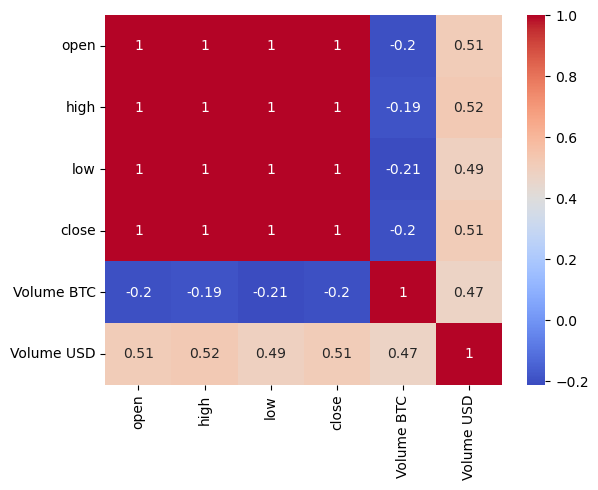

In [71]:
#correlation matrix
corr=BTC.corr()
sb.heatmap(corr, cmap='coolwarm', annot=True)


In [72]:
#droping uneccesary column
BTC.drop(['Volume BTC'],axis=1,inplace=True)

In [73]:
BTC.drop(['symbol'],axis=1,inplace=True)

In [74]:
BTC.head()

,date,open,high,low,close,Volume USD
0,2023-05-13,26812.00,27043.23,26704.39,26782.72,5.877888e+06
1,2023-05-12,26995.01,27084.10,25818.00,26812.00,2.131005e+07
2,2023-05-11,27617.75,27711.50,26723.39,26995.01,1.152452e+07
3,2023-05-10,27648.34,28332.03,26817.83,27617.75,1.568682e+07
4,2023-05-09,27692.90,27828.77,27376.52,27648.34,1.109657e+07


In [75]:
# Split the data into training and testing sets
train_df = BTC[30:]
test_df = BTC[:30]

# Define the feature columns and target column
feature_cols = ['open', 'high', 'low', 'Volume USD']
target_col = 'close'

In [76]:
#applying linear regression 

# Split the training data into X and y
X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the prices for the testing data
X_test = test_df[feature_cols].copy()
y_test_pred = lr.predict(X_test)

# Combine the predicted prices with the actual prices in a DataFrame
test_df['LR_close'] = y_test_pred
result_df = test_df[['date', 'close', 'LR_close']]

C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\383405041.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['LR_close'] = y_test_pred


In [77]:
# Split the training data into X and y
X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

# Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the prices for the testing data
X_test = test_df[feature_cols].copy()
y_test_pred = rf.predict(X_test)

# Combine the predicted prices with the actual prices in a DataFrame
result_df.loc[:,'RF_close'] = y_test_pred

# Print the actual and predicted prices for the testing data


C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\2209159060.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[:,'RF_close'] = y_test_pred


In [78]:
#gradient boosting 


# Split the training data into X and y
X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

# Train a gradient boosting model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predict the prices for the testing data
X_test = test_df[feature_cols].copy()
y_test_pred = gb.predict(X_test)

# Combine the predicted prices with the actual prices in a DataFrame
result_df.loc[:,'GB_close'] = y_test_pred



C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\3566774679.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[:,'GB_close'] = y_test_pred


In [79]:
#LSTM
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['close']])
test_scaled = scaler.transform(test_df[['close']])

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for the LSTM model
X_train = train_scaled[:-1]
y_train = train_scaled[1:]
X_train = X_train.reshape(X_train.shape[0], 1, 1)
y_train = y_train.reshape(y_train.shape[0], 1)

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the testing data
X_test = test_scaled[:-1]
y_test_actual = test_scaled[1:]
X_test = X_test.reshape(X_test.shape[0], 1, 1)
y_test_actual = y_test_actual.reshape(y_test_actual.shape[0], 1)

# Predict the prices for the testing data
y_test_pred = model.predict(X_test)

# Inverse transform the scaled prices to get the actual prices
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test_actual)

# Create a DataFrame to store the predicted values and actual prices
result_lstm_df = pd.DataFrame({'Date': test_df['date'].values[:-1], 'close': y_test_actual.flatten(), 'LSTM_close': y_test_pred.flatten()})

print(result_lstm_df)

Epoch 1/10
97/97 [==============================] - 2s 2ms/step - loss: 0.0522
Epoch 2/10
97/97 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 3/10
97/97 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 4/10
97/97 [==============================] - 0s 2ms/step - loss: 2.5249e-04
Epoch 5/10
97/97 [==============================] - 0s 2ms/step - loss: 2.1664e-04
Epoch 6/10
97/97 [==============================] - 0s 2ms/step - loss: 2.1293e-04
Epoch 7/10
97/97 [==============================] - 0s 2ms/step - loss: 2.0976e-04
Epoch 8/10
97/97 [==============================] - 0s 2ms/step - loss: 2.0314e-04
Epoch 9/10
97/97 [==============================] - 0s 3ms/step - loss: 2.0103e-04
Epoch 10/10
1/1 [==============================] - 0s 351ms/step
         Date     close    LSTM_close
0  2023-05-13  26812.00  26182.755859
1  2023-05-12  26995.01  26212.363281
2  2023-05-11  27617.75  26397.490234
3  2023-05-10  27648.34  27028.343750
4  2023-05

In [82]:
result_df['SYMBOL']='BTC'
result_df.to_excel('BTC_PREDICTIONS.xlsx')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\3604308794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['SYMBOL']='BTC'


In [83]:

result_df

,date,close,LR_close,RF_close,GB_close,SYMBOL
0,2023-05-13,26782.72,26807.947425,26867.0038,27323.774838,BTC
1,2023-05-12,26812.00,26173.109201,26803.3157,27308.822871,BTC
2,2023-05-11,26995.01,26971.729136,27154.3111,27313.266753,BTC
3,2023-05-10,27617.75,27508.337704,27572.0560,27308.822871,BTC
4,2023-05-09,27648.34,27479.274231,27953.2425,27789.951584,BTC
5,2023-05-08,27692.90,27728.044815,28117.9845,28298.935158,BTC
6,2023-05-07,28437.03,28686.547587,28630.9671,28349.496673,BTC
7,2023-05-06,28899.81,28867.267202,29098.6168,29172.812701,BTC
8,2023-05-05,29537.60,29384.416835,29327.0870,29458.208266,BTC
9,2023-05-04,28846.43,28929.633779,28987.4354,28800.921578,BTC
